In [99]:
!pip install ibm-cos-sdk pandas scikit-learn joblib seaborn matplotlib --quiet

In [100]:
import ibm_boto3
from ibm_botocore.client import Config
import io
import pandas as pd

# IBM COS credentials
cos_credentials = {
    "apikey": "rcHOYy4G7h08esHnvoAn3-kYJn7Sp-RC8ujhGyTTqePj",
    "cos_hmac_keys": {
        "access_key_id": "ee71e0505b714325a72318144db34657",
        "secret_access_key": "35d03575997a122f3436853948fae42e38fda09cdfde938c"
    },
    "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/eb28c90795324c308798491901106667:90b7ff3b-1485-4b94-8335-9d9295248c63::"
}

# Adjust these:
cos_endpoint = "https://s3.us-south.cloud-object-storage.appdomain.cloud"  
cos_bucket = "pmgsy-data-bucket" 
cos_file_path = "PMGSY_DATASET.csv" 

# Initialize COS client
cos = ibm_boto3.client("s3",
    aws_access_key_id=cos_credentials["cos_hmac_keys"]["access_key_id"],
    aws_secret_access_key=cos_credentials["cos_hmac_keys"]["secret_access_key"],
    config=Config(signature_version="s3v4"),
    endpoint_url=cos_endpoint
)



In [101]:
# Load CSV from bucket
response = cos.get_object(Bucket=cos_bucket, Key=cos_file_path)
df = pd.read_csv(io.BytesIO(response['Body'].read()))
df.head()

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE,Unnamed: 14
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0,NaN
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0,NaN
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0,NaN
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0,NaN
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0,NaN


In [102]:
print("Shape of dataset:", df.shape)

Shape of dataset: (2189, 15)


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189 entries, 0 to 2188
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STATE_NAME                      2189 non-null   object 
 1   DISTRICT_NAME                   2189 non-null   object 
 2   PMGSY_SCHEME                    2189 non-null   object 
 3   NO_OF_ROAD_WORK_SANCTIONED      2189 non-null   int64  
 4   LENGTH_OF_ROAD_WORK_SANCTIONED  2189 non-null   float64
 5   NO_OF_BRIDGES_SANCTIONED        2189 non-null   int64  
 6   COST_OF_WORKS_SANCTIONED        2137 non-null   float64
 7   NO_OF_ROAD_WORKS_COMPLETED      2189 non-null   int64  
 8   LENGTH_OF_ROAD_WORK_COMPLETED   2189 non-null   float64
 9   NO_OF_BRIDGES_COMPLETED         2189 non-null   int64  
 10  EXPENDITURE_OCCURED             2189 non-null   float64
 11  NO_OF_ROAD_WORKS_BALANCE        2189 non-null   int64  
 12  LENGTH_OF_ROAD_WORK_BALANCE     21

In [104]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
LENGTH_OF_ROAD_WORK_SANCTIONED       0
NO_OF_BRIDGES_SANCTIONED             0
COST_OF_WORKS_SANCTIONED            52
NO_OF_ROAD_WORKS_COMPLETED           0
LENGTH_OF_ROAD_WORK_COMPLETED        0
NO_OF_BRIDGES_COMPLETED              0
EXPENDITURE_OCCURED                  0
NO_OF_ROAD_WORKS_BALANCE             0
LENGTH_OF_ROAD_WORK_BALANCE          0
NO_OF_BRIDGES_BALANCE                0
Unnamed: 14                       2189
dtype: int64


In [105]:
df.drop(columns=['Unnamed: 14'], inplace=True)

In [106]:
df['COST_OF_WORKS_SANCTIONED'].fillna(df['COST_OF_WORKS_SANCTIONED'].median(), inplace=True)


In [107]:
print(df.isnull().sum())

STATE_NAME                        0
DISTRICT_NAME                     0
PMGSY_SCHEME                      0
NO_OF_ROAD_WORK_SANCTIONED        0
LENGTH_OF_ROAD_WORK_SANCTIONED    0
NO_OF_BRIDGES_SANCTIONED          0
COST_OF_WORKS_SANCTIONED          0
NO_OF_ROAD_WORKS_COMPLETED        0
LENGTH_OF_ROAD_WORK_COMPLETED     0
NO_OF_BRIDGES_COMPLETED           0
EXPENDITURE_OCCURED               0
NO_OF_ROAD_WORKS_BALANCE          0
LENGTH_OF_ROAD_WORK_BALANCE       0
NO_OF_BRIDGES_BALANCE             0
dtype: int64


In [108]:
df.describe()

,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE
count,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2189.00000,2189.000000
mean,86.090909,376.789079,5.405665,177.520647,82.154408,348.210419,4.100046,146.808142,3.936501,20.71080,1.305619
std,149.383895,565.452551,13.468118,242.345152,150.034386,551.504270,12.062965,231.711044,8.787408,51.32278,5.155025
min,0.000000,0.000000,0.000000,0.847800,0.000000,0.000000,0.000000,-267.041500,0.000000,0.00000,0.000000
25%,9.000000,69.185000,0.000000,42.640700,5.000000,48.400000,0.000000,26.098200,0.000000,0.00000,0.000000
50%,19.000000,141.220000,0.000000,93.060600,14.000000,112.405000,0.000000,62.781400,0.000000,0.00000,0.000000
75%,91.000000,423.942000,5.000000,196.442700,86.000000,400.157000,2.000000,156.467700,4.000000,15.83800,0.000000
max,1263.000000,4546.134000,220.000000,2004.871570,1263.000000,4349.940000,209.000000,1958.774300,121.000000,571.68000,106.000000


In [109]:
df = pd.get_dummies(df, columns=['STATE_NAME', 'DISTRICT_NAME'], drop_first=True)

In [110]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['PMGSY_SCHEME'] = label_encoder.fit_transform(df['PMGSY_SCHEME'])


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['PMGSY_SCHEME'])
y = df['PMGSY_SCHEME']


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [133]:
y_pred = model.predict(X_test)

In [134]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8904109589041096


In [115]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

   PM-JANMAN       1.00      1.00      1.00         6
     PMGSY-I       0.96      0.90      0.93       143
    PMGSY-II       0.85      0.95      0.90       128
   PMGSY-III       0.86      0.87      0.87       150
     RCPLWEA       1.00      0.18      0.31        11

    accuracy                           0.89       438
   macro avg       0.93      0.78      0.80       438
weighted avg       0.90      0.89      0.88       438



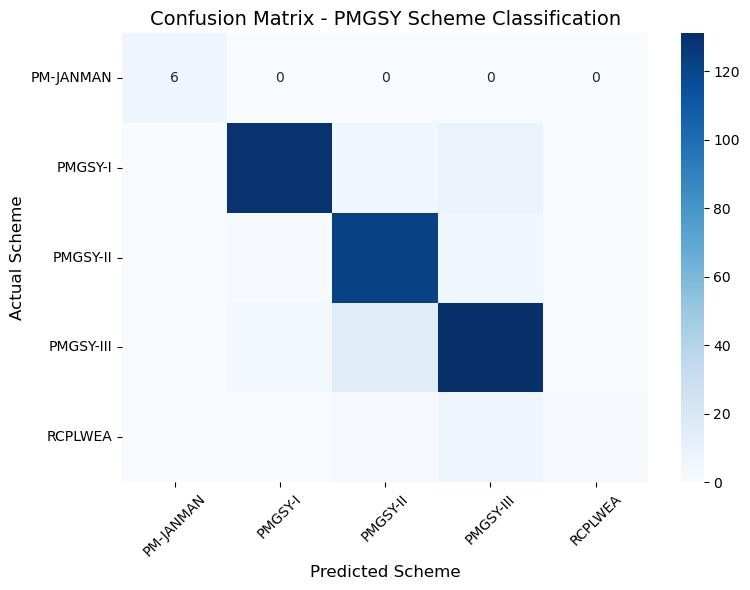

In [116]:
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title("Confusion Matrix - PMGSY Scheme Classification", fontsize=14)
plt.xlabel("Predicted Scheme", fontsize=12)
plt.ylabel("Actual Scheme", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [117]:
import joblib

joblib.dump(model, 'pmgsy_rf_model.pkl')
print("Model saved as 'pmgsy_rf_model.pkl'")


Model saved as 'pmgsy_rf_model.pkl'
